In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [5]:
#Load your dataset
df = pd.read_csv("merged_data_clean.csv")

#Ensure the 'Datum' column is in datetime format
df['Datum'] = pd.to_datetime(df['Datum'])

#Define time ranges
train_start = '2013-07-01'
train_end = '2017-07-31'
val_start = '2017-08-01'
val_end = '2018-07-31'
test_start = '2018-08-01'
test_end = '2019-07-30'

#Split data
train_data = df[(df['Datum'] >= train_start) & (df['Datum'] <= train_end)]
validation_data = df[(df['Datum'] >= val_start) & (df['Datum'] <= val_end)]
test_data = df[(df['Datum'] >= test_start) & (df['Datum'] <= test_end)]

#Optional: print shapes
print("Train shape:", train_data.shape)
print("Validation shape:", validation_data.shape)
print("Test shape:", test_data.shape)

Train shape: (7517, 9)
Validation shape: (1839, 9)
Test shape: (351, 9)


In [6]:
df.head()

,Datum,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,id,Warengruppe,Umsatz,KielerWoche
0,2012-01-01,8.0,9.82,14,58.0,NaN,NaN,NaN,NaN
1,2012-01-02,7.0,7.44,12,NaN,NaN,NaN,NaN,NaN
2,2012-01-03,8.0,5.54,18,63.0,NaN,NaN,NaN,NaN
3,2012-01-04,4.0,5.69,19,80.0,NaN,NaN,NaN,NaN
4,2012-01-05,6.0,5.30,23,80.0,NaN,NaN,NaN,NaN


In [7]:
columns = train_data.columns.tolist()
columns

['Datum',
 'Bewoelkung',
 'Temperatur',
 'Windgeschwindigkeit',
 'Wettercode',
 'id',
 'Warengruppe',
 'Umsatz',
 'KielerWoche']

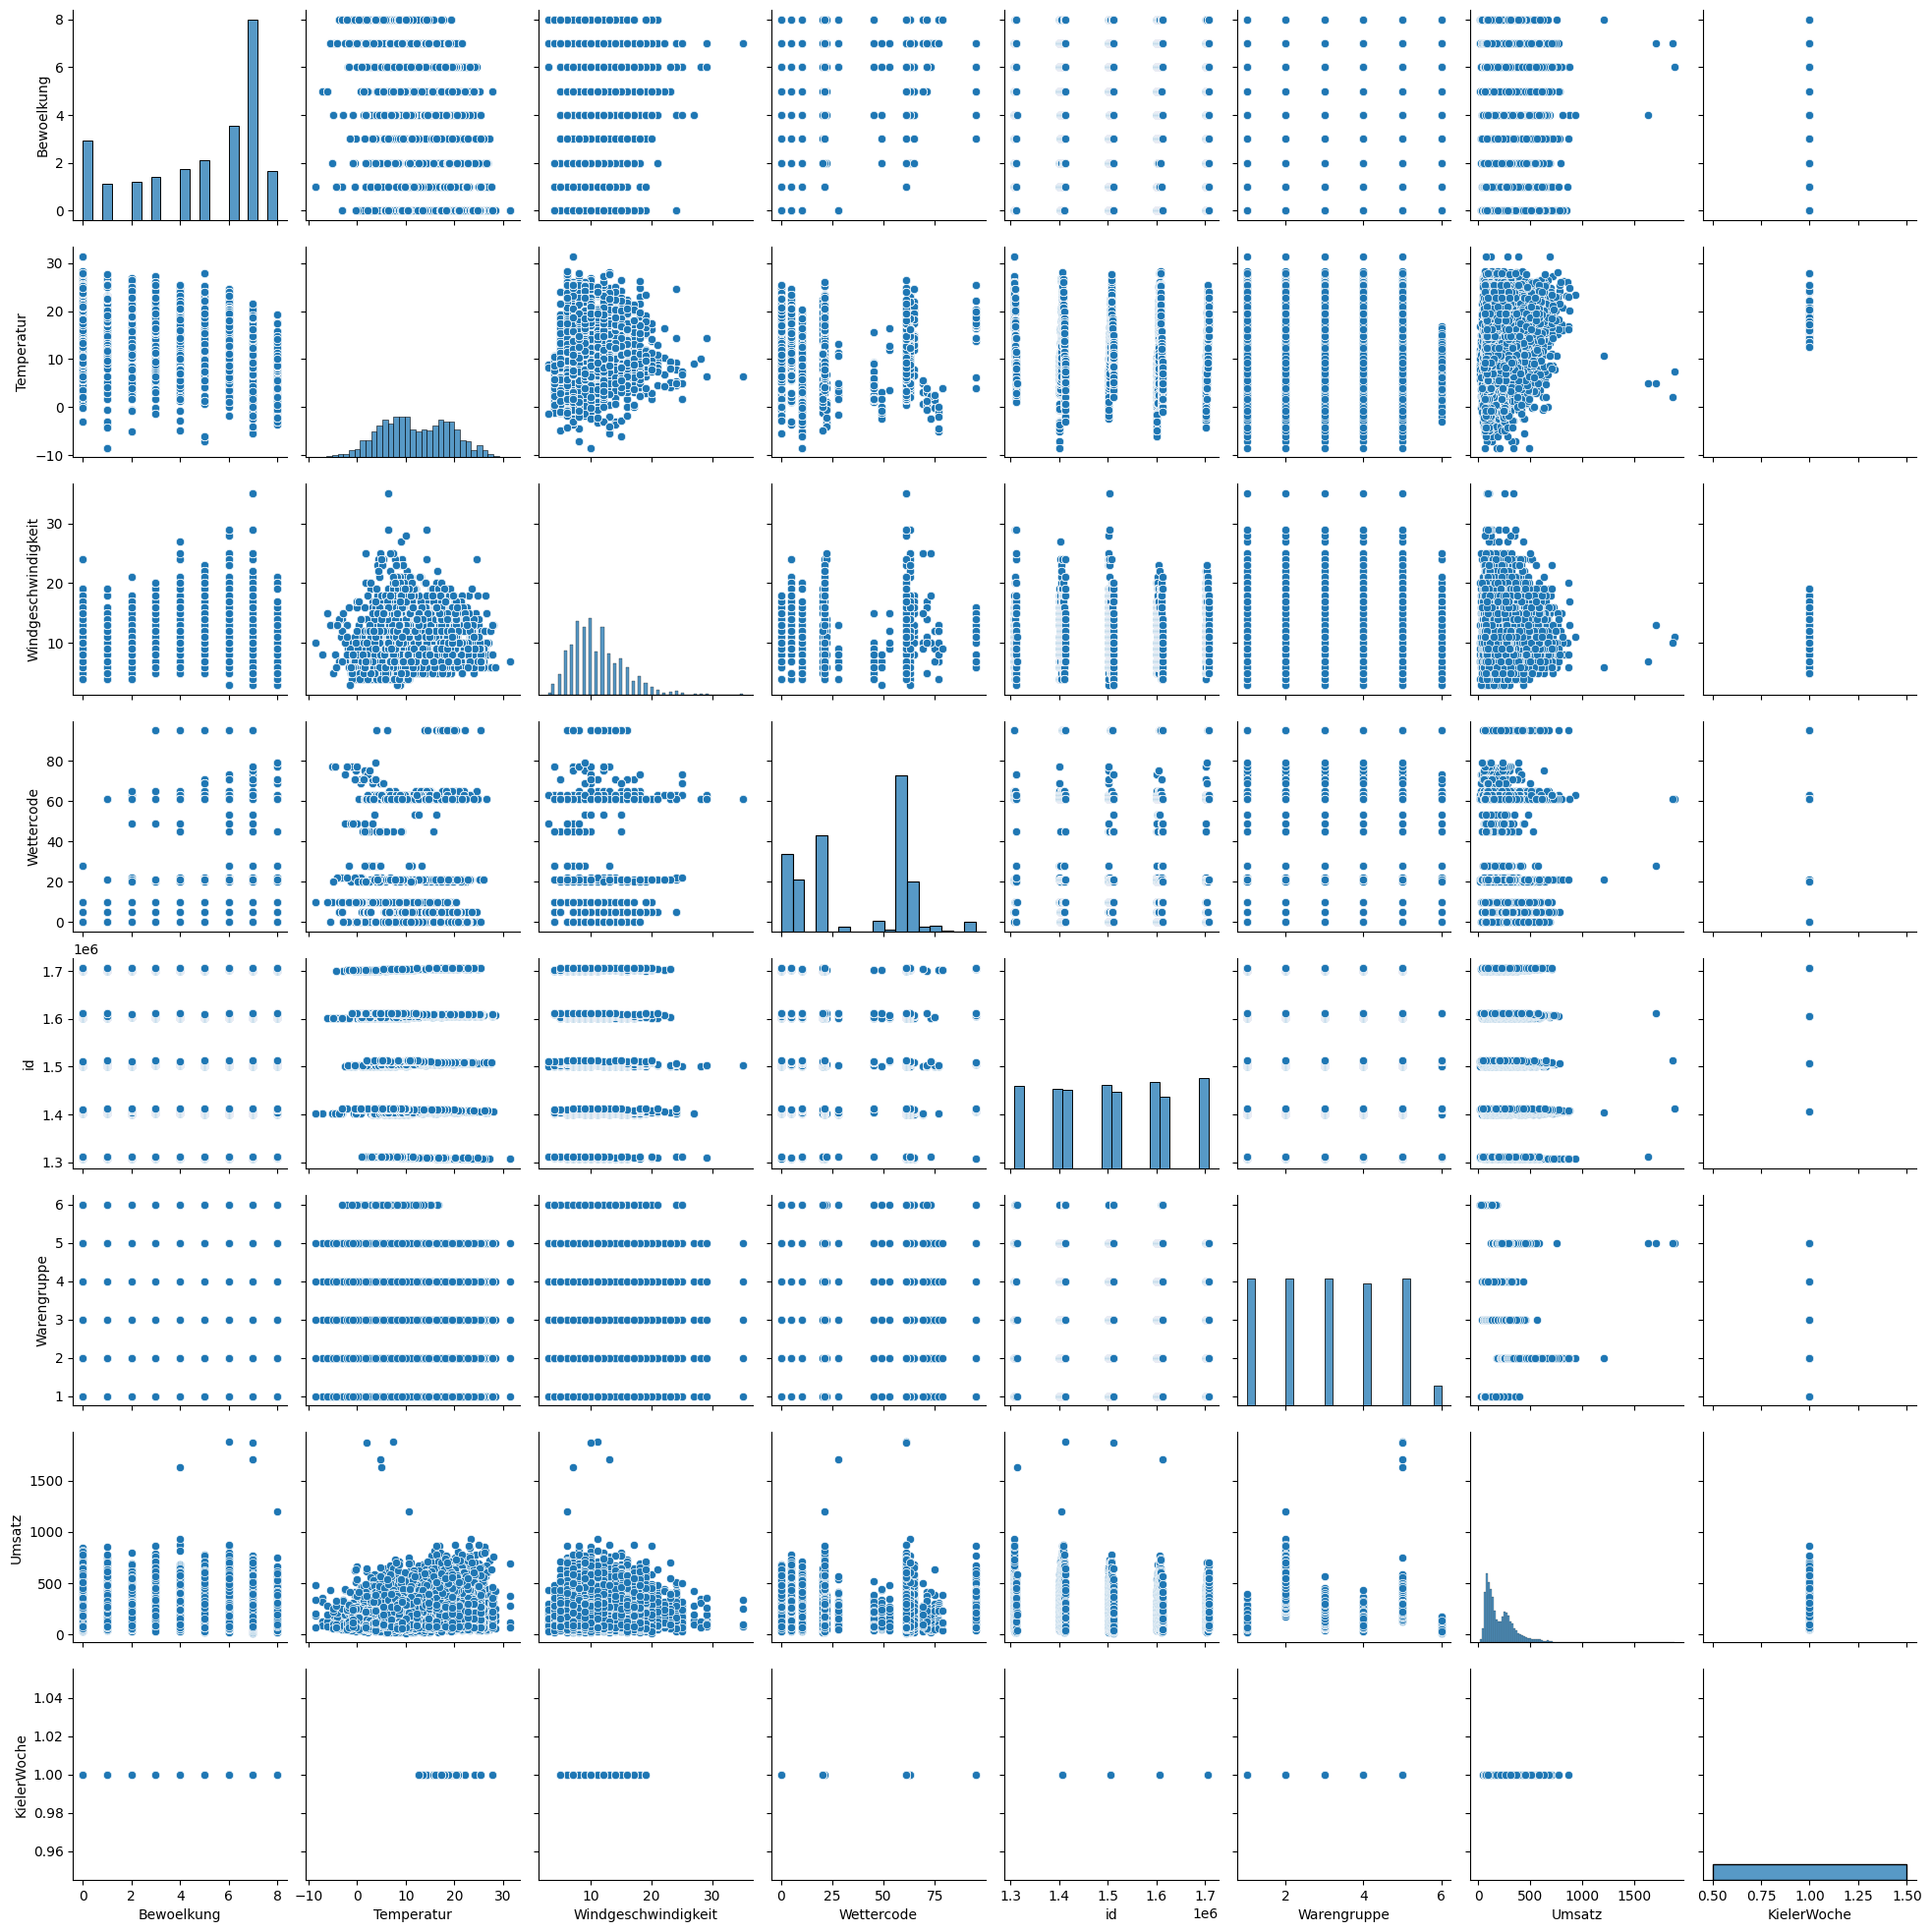

In [8]:
sns.pairplot(train_data[columns])

In [9]:
#remove all non-numeric columns for correlation
columns = [col for col in columns if train_data[col].dtype in ['float64', 'int64']]
train_data[columns].corr()

,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,id,Warengruppe,Umsatz,KielerWoche
Bewoelkung,1.000000,-0.376459,0.042912,0.478444,0.041113,0.021822,-0.085921,NaN
Temperatur,-0.376459,1.000000,0.003471,0.011623,-0.095729,-0.047716,0.216570,NaN
Windgeschwindigkeit,0.042912,0.003471,1.000000,0.127076,0.027233,-0.008083,0.011454,NaN
Wettercode,0.478444,0.011623,0.127076,1.000000,-0.053262,0.005265,0.001147,NaN
id,0.041113,-0.095729,0.027233,-0.053262,1.000000,-0.025438,-0.097429,NaN
Warengruppe,0.021822,-0.047716,-0.008083,0.005265,-0.025438,1.000000,-0.059875,NaN
Umsatz,-0.085921,0.216570,0.011454,0.001147,-0.097429,-0.059875,1.000000,NaN
KielerWoche,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# linear regression model Umsatz ~ Warengruppe
Y = train_data['Umsatz']
X = sm.add_constant(pd.get_dummies(train_data['Warengruppe'], drop_first=True, dtype=int))
X.head()
# Drop rows where either X or Y is NaN
valid_idx = Y.notna() & X.notna().all(axis=1)
Y_clean = Y[valid_idx]
X_clean = X[valid_idx]

model = sm.OLS(Y_clean, X_clean)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     2783.
Date:                Tue, 27 May 2025   Prob (F-statistic):               0.00
Time:                        12:29:25   Log-Likelihood:                -44092.
No. Observations:                7487   AIC:                         8.820e+04
Df Residuals:                    7481   BIC:                         8.824e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.3782      2.287     53.079      0.0